In [1]:
import os
os.chdir("..")
home_dir = os.getcwd()
os.chdir("src")
from sdhm import SDHM
from baumwelch import BaumWelch
from accesstracer import AccessTracer
os.chdir(home_dir)

import numpy as np
import pandas as pd
import scipy.stats as st
import numpy.random as rd
import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use("ggplot")

%matplotlib inline

# Access Tracer

1. 隠れマルコフモデルの混合分布による行動モデリング
2. 複数の混合隠れマルコフモデルのオンライン忘却型学習
3. 動的モデル選択による最適混合数の決定
4. スコアリング

## データ生成

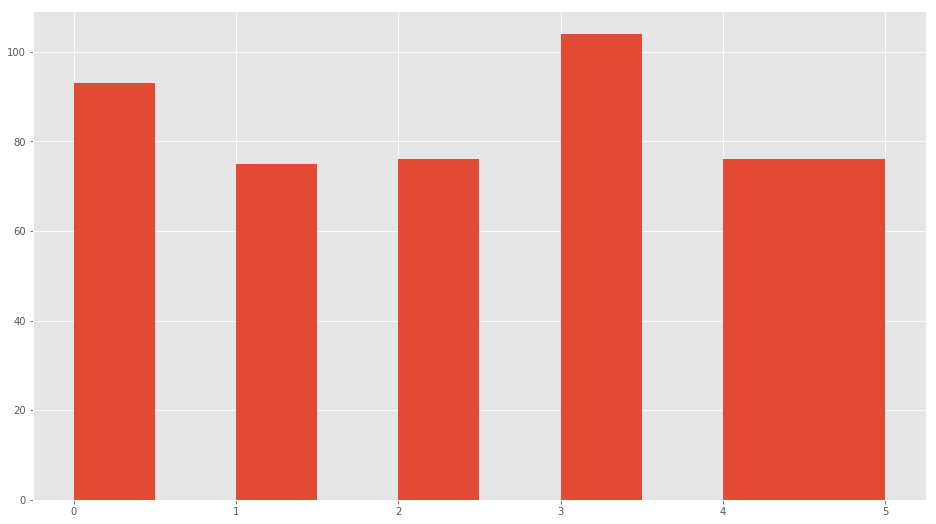

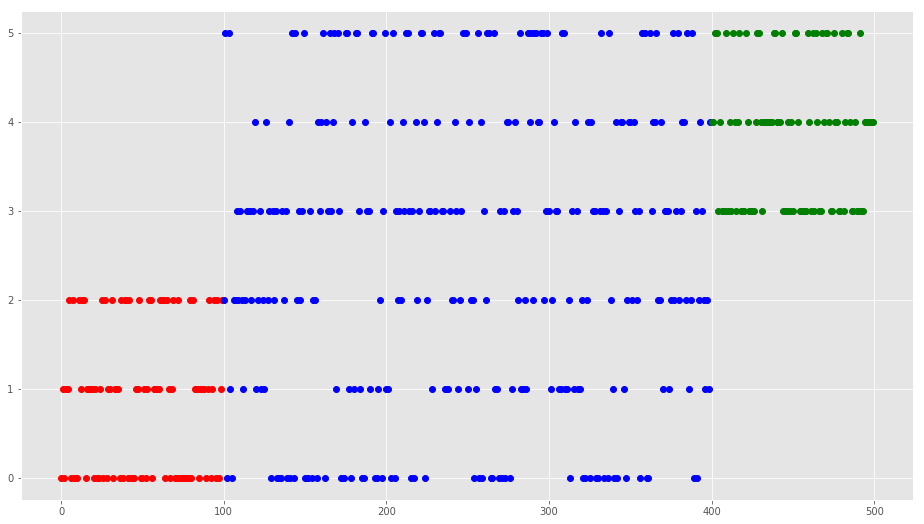

In [2]:
rd.seed(0)

dice1 = [0, 1, 2, 3, 4, 5]
dice2 = [0, 1, 2]
dice3 = [3, 4, 5]

y1 = rd.choice(dice2, 100)
flag1 = np.array([2 for i in range(100)])
y2 = rd.choice(dice1, 300)
flag2 = np.array([1 for i in range(300)])
y3 = rd.choice(dice3, 100)
flag3 = np.array([3 for i in range(100)])

y = np.concatenate([y1, y2, y3])
flag = np.concatenate([flag1, flag2, flag3])
data = np.concatenate([y[:, np.newaxis], flag[:, np.newaxis]], axis=1)
org_data = pd.DataFrame(data)

plt.figure(figsize=(16, 9))
plt.hist(org_data[0])
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(org_data.loc[org_data[1]==2][0], "o", c="r")
plt.plot(org_data.loc[org_data[1]==1][0], "o", c="b")
plt.plot(org_data.loc[org_data[1]==3][0], "o", c="g")
plt.show()

In [3]:
window_size = 5
y = np.array([np.array(org_data[0][i:i+window_size]) for i in range(0, org_data.shape[0], 5)])

In [4]:
y

array([[0, 1, 0, 1, 1],
       [2, 0, 2, 0, 0],
       [0, 2, 1, 2, 2],
       [0, 1, 1, 1, 1],
       [0, 1, 0, 0, 1],
       [2, 0, 2, 0, 1],
       [1, 2, 0, 1, 1],
       [1, 0, 2, 0, 2],
       [2, 0, 2, 0, 0],
       [0, 1, 1, 2, 0],
       [0, 1, 0, 1, 2],
       [2, 0, 1, 1, 1],
       [1, 2, 2, 2, 0],
       [2, 1, 0, 1, 2],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 0, 2],
       [0, 2, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [1, 2, 0, 1, 2],
       [0, 2, 0, 1, 2],
       [2, 5, 0, 5, 1],
       [0, 2, 2, 3, 2],
       [3, 2, 1, 2, 3],
       [3, 3, 2, 3, 4],
       [1, 2, 3, 1, 2],
       [1, 4, 2, 3, 0],
       [3, 2, 3, 0, 0],
       [0, 3, 2, 3, 0],
       [4, 0, 5, 0, 5],
       [2, 3, 2, 3, 5],
       [0, 0, 0, 3, 0],
       [2, 2, 0, 4, 3],
       [4, 5, 0, 4, 3],
       [5, 3, 4, 5, 1],
       [5, 3, 0, 0, 0],
       [5, 5, 1, 0, 4],
       [1, 5, 5, 3, 1],
       [0, 0, 4, 3, 3],
       [1, 5, 5, 0, 0],
       [1, 2, 0, 3, 5],
       [1, 1, 4, 0, 5],
       [0, 3, 2,

## SDHM

In [5]:
# Given
r = 0.1 # 忘却パラメータ 0<r<1
nu = 0.1 # 推定係数
K = 3 # 混合数
n = 1 # HMMの次数
M = y.shape[0] # データ数
Tj = y.shape[1] # セッションの長さ
N1 = 3
N2 = 6

In [6]:
ac = AccessTracer(r, nu, K, Tj, N1, N2, n=1)

In [7]:
ac.all_update(y)

1.54100204025e-05
1.54100204025e-05
1.54100204025e-05
1.54100204025e-05
1.30412263716e-05
1.30412263716e-05
1.30412263716e-05
1.30412263716e-05
0.000169227065676
0.000169227065676
0.000169227065676
0.000169227065676
0.00047808776143
0.00047808776143
0.00047808776143
0.00047808776143
0.000111480329812
0.000111480329812
0.000111480329812
0.000111480329812
4.99487052872e-05
4.99487052872e-05
4.99487052872e-05
4.99487052872e-05
9.62454356949e-05
9.62454356949e-05
9.62454356949e-05
9.62454356949e-05
6.79102727806e-05
6.79102727806e-05
6.79102727806e-05
6.79102727806e-05
0.000140292484734
0.000140292484734
0.000140292484734
0.000140292484734
1.90419861661e-05
1.90419861661e-05
1.90419861661e-05
1.90419861661e-05
8.0249122655e-05
8.0249122655e-05
8.0249122655e-05
8.0249122655e-05
0.000352268199989
0.000352268199989
0.000352268199989
0.000352268199989
0.000235034846223
0.000235034846223
0.000235034846223
0.000235034846223
0.000186252910414
0.000186252910414
0.000186252910414
0.000186252910414


0.000376825969519
0.000376825969519
0.000376825969519
0.000376825969519
3.56892894766e-05
3.56892894766e-05
3.56892894766e-05
3.56892894766e-05
0.000273698740643
0.000273698740643
0.000273698740643
0.000273698740643
8.18340830287e-05
8.18340830287e-05
8.18340830287e-05
8.18340830287e-05
2.88378681205e-05
2.88378681205e-05
2.88378681205e-05
2.88378681205e-05
0.000712383897282
0.000712383897282
0.000712383897282
0.000712383897282
9.80539921974e-05
9.80539921974e-05
9.80539921974e-05
9.80539921974e-05
0.00114401392152
0.00114401392152
0.00114401392152
0.00114401392152
0.000109913555598
0.000109913555598
0.000109913555598
0.000109913555598
0.000175895866215
0.000175895866215
0.000175895866215
0.000175895866215
0.00137562240977
0.00137562240977
0.00137562240977
0.00137562240977
0.0001755759493
0.0001755759493
0.0001755759493
0.0001755759493
0.000124940506483
0.000124940506483
0.000124940506483
0.000124940506483
0.000106800332291
0.000106800332291
0.000106800332291
0.000106800332291
0.000304

7.41383736107e-05
7.41383736107e-05
7.41383736107e-05
7.41383736107e-05
3.08716857097e-05
3.08716857097e-05
3.08716857097e-05
3.08716857097e-05
9.76484842543e-05
9.76484842543e-05
9.76484842543e-05
9.76484842543e-05
4.62241588462e-06
4.62241588462e-06
4.62241588462e-06
4.62241588462e-06
6.26526878193e-06
6.26526878193e-06
6.26526878193e-06
6.26526878193e-06
0.000133111577352
0.000133111577352
0.000133111577352
0.000133111577352
7.20822030539e-05
7.20822030539e-05
7.20822030539e-05
7.20822030539e-05
8.27914977938e-05
8.27914977938e-05
8.27914977938e-05
8.27914977938e-05
5.47443716074e-05
5.47443716074e-05
5.47443716074e-05
5.47443716074e-05
2.11979364548e-05
2.11979364548e-05
2.11979364548e-05
2.11979364548e-05
0.000176868400796
0.000176868400796
0.000176868400796
0.000176868400796
4.377840491e-05
4.377840491e-05
4.377840491e-05
4.377840491e-05
6.24166630275e-05
6.24166630275e-05
6.24166630275e-05
6.24166630275e-05
4.1970255727e-05
4.1970255727e-05
4.1970255727e-05
4.1970255727e-05
6.23

9.2013739707e-05
9.2013739707e-05
9.2013739707e-05
9.2013739707e-05
0.000132855003746
0.000132855003746
0.000132855003746
0.000132855003746
0.000114468202042
0.000114468202042
0.000114468202042
0.000114468202042
0.000126145686954
0.000126145686954
0.000126145686954
0.000126145686954
0.000135672425138
0.000135672425138
0.000135672425138
0.000135672425138
0.000393405732769
0.000393405732769
0.000393405732769
0.000393405732769
3.62001135918e-05
3.62001135918e-05
3.62001135918e-05
3.62001135918e-05
4.96508466543e-05
4.96508466543e-05
4.96508466543e-05
4.96508466543e-05
4.38311295126e-05
4.38311295126e-05
4.38311295126e-05
4.38311295126e-05
4.53261684825e-05
4.53261684825e-05
4.53261684825e-05
4.53261684825e-05
4.15306355797e-05
4.15306355797e-05
4.15306355797e-05
4.15306355797e-05
4.09652504302e-06
4.09652504302e-06
4.09652504302e-06
4.09652504302e-06
5.92865953601e-05
5.92865953601e-05
5.92865953601e-05
5.92865953601e-05
0.000181219387925
0.000181219387925
0.000181219387925
0.000181219387

In [8]:
df = pd.DataFrame(y, columns=["y%s" % i for i in range(1, Tj+1)])
df["N_K"] = ac.N_K
df["S_A"] = ac.S_A

display(df.head())

,y1,y2,y3,y4,y5,N_K,S_A
0,0,1,0,1,1,3.0,1.690682
1,2,0,2,0,0,3.0,1.773157
2,0,2,1,2,2,3.0,1.747745
3,0,1,1,1,1,3.0,1.834738
4,0,1,0,0,1,2.0,1.550404


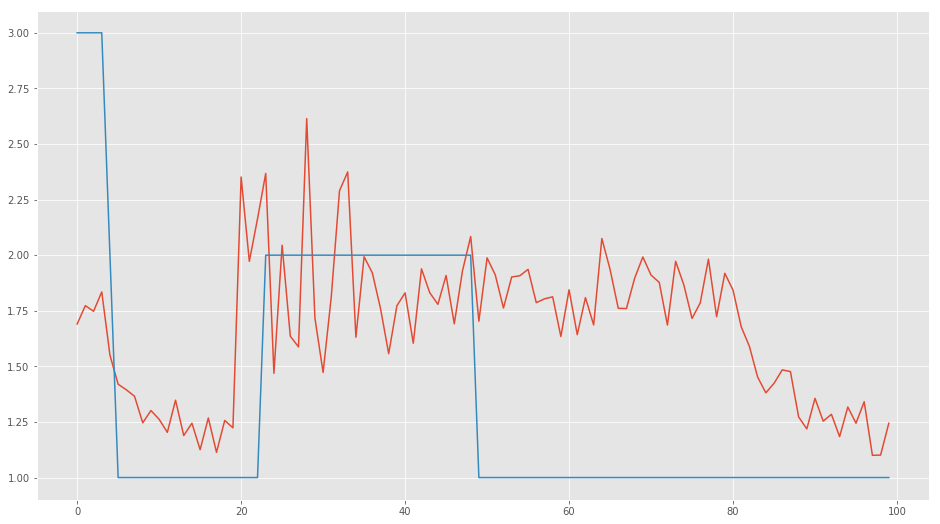

In [9]:
plt.figure(figsize=(16, 9))
plt.plot(df.S_A)
plt.plot(df.N_K)